In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

In [13]:
data=load_iris()

In [14]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
print(data.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
iris_df=pd.DataFrame(data=data.data, columns=data.feature_names)
target_df=pd.DataFrame(data=data.target, columns=['species'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
def converter(s):
    if s==0:
        return 'setosa'
    elif s==1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species']=target_df['species'].apply(converter)
iris_df=pd.concat([iris_df,target_df],axis=1)

In [20]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
print(target_df.head())

  species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


In [26]:
X=iris_df['sepal width (cm)'].values.reshape(-1,1)
y=iris_df['sepal length (cm)']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [27]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [40]:
m=lr.coef_
c=lr.intercept_
print("y=",m,"x+",c)

y= [-0.22336106] x+ 6.526222550894481


In [32]:
pred=lr.predict(X_test)
print(X_test[:5])

[[4.2]
 [3.9]
 [3.5]
 [3. ]
 [3.2]]


In [33]:
print(pred[:5])

[5.58810609 5.65511441 5.74445884 5.85613937 5.81146716]


In [34]:
print(y_test[:5])

33     5.5
16     5.4
43     5.0
129    7.2
50     7.0
Name: sepal length (cm), dtype: float64


In [38]:
print("RMSE",metrics.mean_squared_error(y_test,pred,squared=False))
print("MSE",metrics.mean_squared_error(y_test,pred))
print("MAE",metrics.mean_absolute_error(y_test,pred))

RMSE 0.809682215453042
MSE 0.6555852900209463
MAE 0.6598262098331624


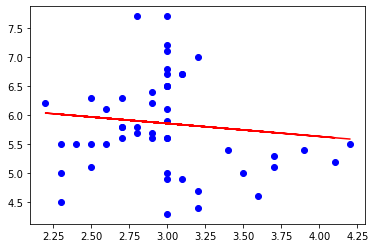

In [37]:
plt.scatter(X_test,y_test,color="b")
plt.plot(X_test,pred,color="r")
plt.show()

In [41]:
def myfunc(p):
    return (-0.22*p)+6.53
print(myfunc(4))

5.65
